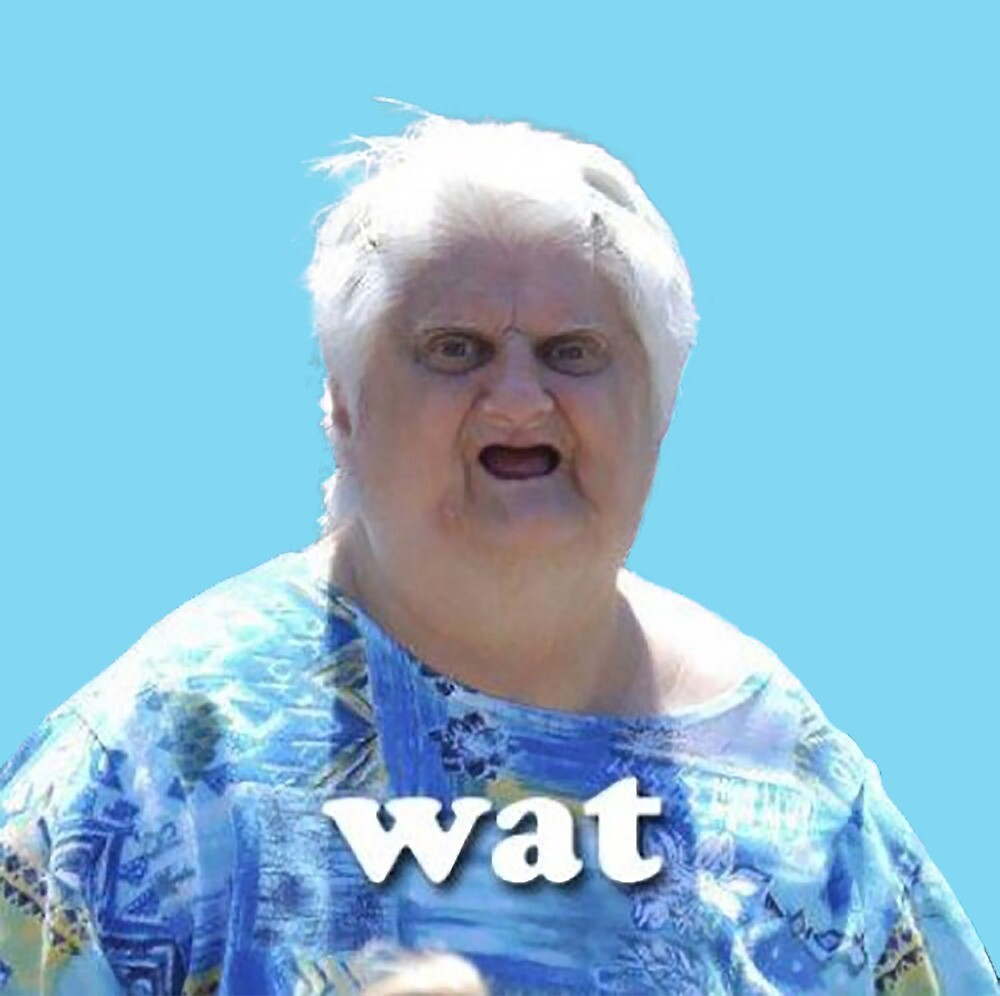

In [146]:
from IPython.display import Image
Image(filename='data/kerry/wat.jpg') 


In [161]:
X_test, test_labels_one_hot = get_batch(1,100)

uniques, ids = np.unique(letters, return_inverse=True)
y_pred = model.predict(X_test)
y_pred=uniques[y_pred.argmax(1)]

y_test = uniques[test_labels_one_hot.argmax(1)]

import matplotlib.pyplot as plt

df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index = [i for i in letters],
                  columns = [i for i in letters])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

ValueError: need at least one array to stack

In [153]:

from __future__ import print_function
import cv2
import pandas as pd
import numpy as np

import glob
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D
from keras import models
from keras import backend as K
from keras import layers 
import seaborn as sns


from keras.datasets import mnist
from keras.utils import to_categorical
from keras import optimizers

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix



In [154]:
sign_alphabet = [
    *glob.glob("data/kerry/**/*.jpeg"),
]


In [155]:
pics = dict()
for foto in sign_alphabet:
    label = foto.split("/")[-2]
    pic = foto
    if label in pics:
        pics[label].append(pic)
    else:
        pics[label] = [pic]

In [156]:
im = []
for k,v in pics.items():
    for a in v:
        im.append([k,a])
alphabet =  pd.DataFrame(im, columns=["label","foto"])
alphabet = alphabet.sort_values(by='label',)



In [157]:
letters = ["T"]
number_of_classes = len(letters)
img_size = (100,100)
number_of_samples=50
number_of_classes


1

In [158]:
from PIL import Image
from imageProcessing import resizeImg, generateMask
import matplotlib.image as mpimg
def normalize_image(picFile):
    img = cv2.imread(picFile)    
    image = mpimg.imread(picFile)
    plt.imshow(image)
    plt.show()  

#     im_bw = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
#     im_bw = cv2.resize(im_bw, img_size, interpolation=cv2.INTER_AREA)
    im = Image.fromarray(img)

    resized_image = resizeImg(im, dimension=(256,384))
    mask = generateMask(resized_image)

    foreground_mask = np.any(mask != [0, 0, 0], axis=-1)
    imgarray = np.array(resized_image.convert("RGB"))
    foreground_mask_reshaped =np.repeat(foreground_mask[:, :, np.newaxis], 3, axis=2)

    foreground_mask_image = foreground_mask_reshaped*imgarray



      
    plt.imshow(foreground_mask_image)
    plt.show()
    
    img_bw = cv2.cvtColor(foreground_mask_image,cv2.COLOR_BGR2GRAY)
    ret,binary_image = cv2.threshold(img_bw,60,255,cv2.THRESH_BINARY)
    
    plt.imshow(binary_image,cmap='gray')
    plt.show()
    if('nothing' in picFile):
        blank_image =  np.ones(shape=[100,100], dtype=np.uint8)
        return blank_image

    
    return foreground_mask_image

T
   label                  foto
16     T  data/kerry/T/t2.jpeg


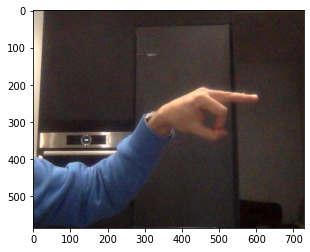

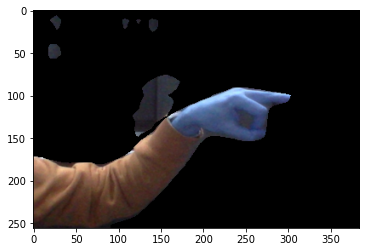

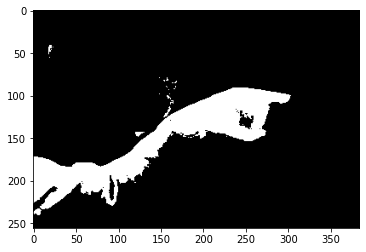

In [159]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8, 4))

def generate_dataframe(ind,number_of_samples):

    filtered_df = pd.DataFrame()
    for i,letter in enumerate(letters):
        print(letter)
        filtered_df= filtered_df.append(alphabet[alphabet.label==letter])
#                                         .iloc[ind*number_of_samples:(ind+1)*number_of_samples])
        print(filtered_df)  
    filtered_df["normalized_image"] = filtered_df.foto.apply(lambda path: normalize_image(path))
    

    return filtered_df
test_df = generate_dataframe(1,1)
# for i,img in enumerate(test_df['normalized_image']):
#     print(img.shape)
#     plt.imshow(img,cmap='gray')
#     plt.show()



    

    

In [160]:
def get_batch(ind,number_of_samples):
    filtered_df = pd.DataFrame()
    for letter in letters:
        filtered_df= filtered_df.append(alphabet[alphabet.label==letter].iloc[ind*number_of_samples:(ind+1)*number_of_samples])
    filtered_df["normalized_image"] = filtered_df.foto.apply(lambda path: normalize_image(path))
    train_images = filtered_df['normalized_image']
    train_labels = filtered_df['label']

    le = preprocessing.LabelEncoder()

    le.fit(letters)
    train_labels =le.transform(train_labels)
    y = keras.utils.to_categorical(train_labels, num_classes =number_of_classes)

    X = np.stack(train_images, axis=0) 
    X = X.reshape(X.shape[0],img_size[0],img_size[1],1)


    return X, y

In [97]:
# filtered_df= filtered_df.append(alphabet[alphabet.label==letter].head(300))
# filtered_df["normalized_image"] = filtered_df.foto.apply(lambda path: normalize_image(path))
# get_batch(1)

In [34]:

train_images = filtered_df['normalized_image']
train_labels = filtered_df['label']

# Split data for test and train
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.2) 

# get Labels
le = preprocessing.LabelEncoder()
le.fit(letters)

train_labels =le.transform(y_train)
test_labels =le.transform(y_test)

# ONE HOT ENCODING
train_labels_one_hot = keras.utils.to_categorical(train_labels, num_classes =number_of_classes)
test_labels_one_hot = keras.utils.to_categorical(test_labels, num_classes =number_of_classes)

# RESIZE INPUT DATA
X_train = np.stack(X_train, axis=0) 
X_train = X_train.reshape(X_train.shape[0],img_size[0],img_size[1],1)

X_test = np.stack(X_test, axis=0) 
X_test = X_test.reshape(X_test.shape[0],img_size[0],img_size[1],1)




NameError: name 'filtered_df' is not defined

In [10]:


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', 
                        input_shape=(img_size[0],img_size[1], 1))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(number_of_classes, activation='softmax')) # 10 clases


model.summary()


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 28224)             0         
_________________________________________________________________
dens

In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
model = keras.models.load_model('models/secondModelAllLetters')

Instructions for updating:
Use tf.cast instead.


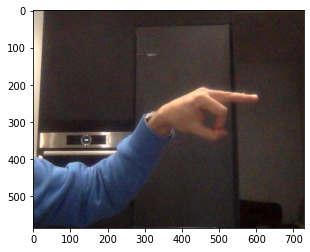

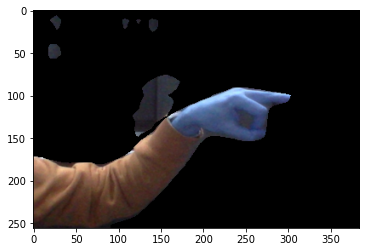

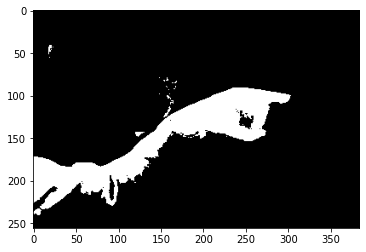

ValueError: cannot reshape array of size 294912 into shape (1,100,100,1)

In [163]:
for i in range(10):
    for j in range(10):
        X_train, train_labels_one_hot = get_batch(i,50)
        print("BATCH", i )
        res = model.train_on_batch(X_train, train_labels_one_hot)
        print('ACCURACY :', res[1])


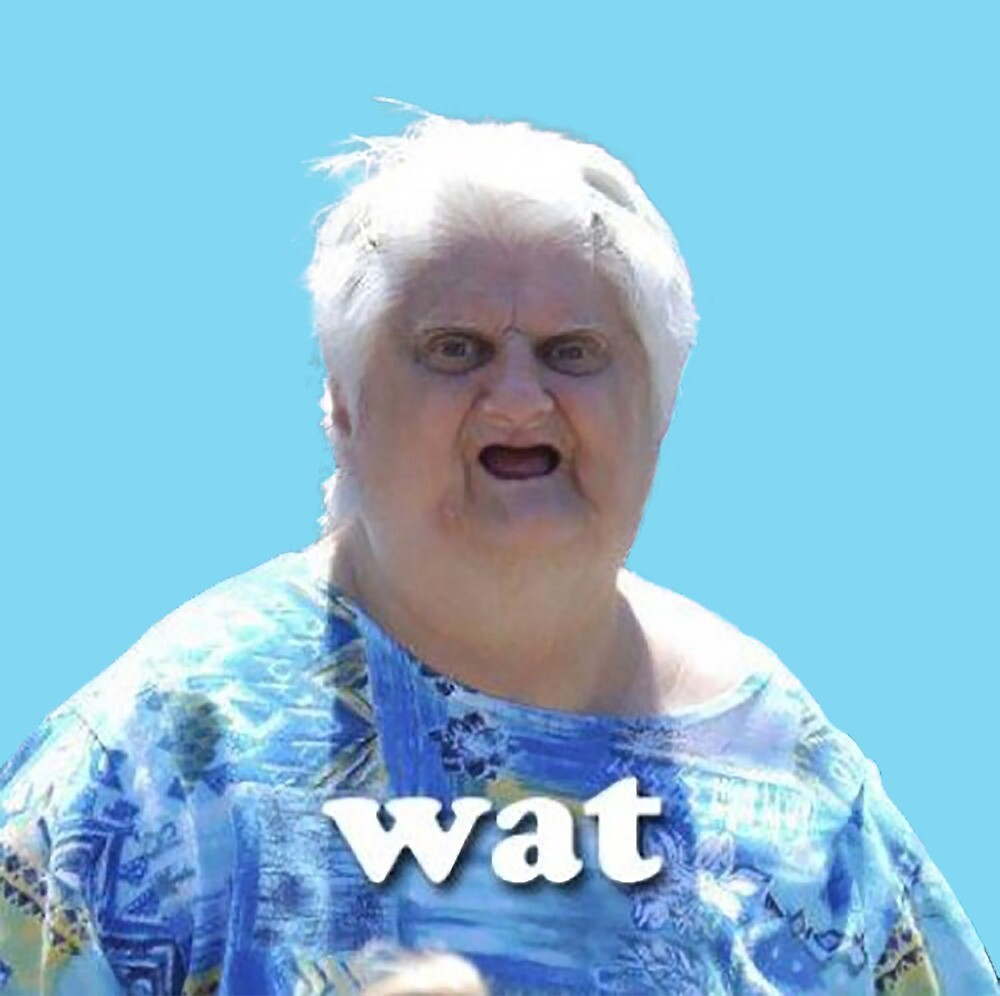

In [167]:
from IPython.display import Image
Image(filename='data/kerry/wat.jpg', width = 600, height = 600) 


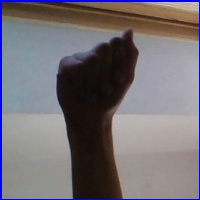

In [166]:
from IPython.display import Image
Image(filename='data/asl_alphabet_train/A/A1.jpg') 


<AxesSubplot:>

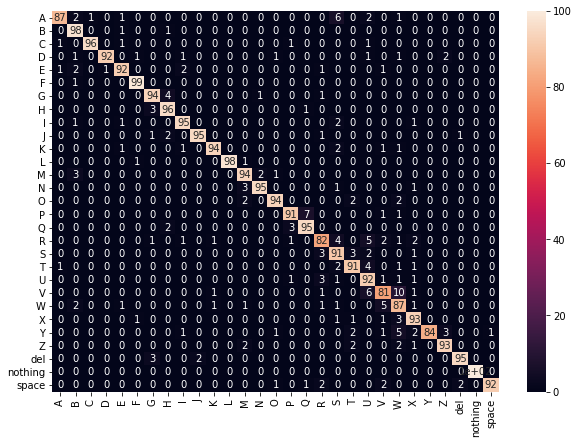

In [34]:

X_test, test_labels_one_hot = get_batch(1,100)

uniques, ids = np.unique(letters, return_inverse=True)
y_pred = model.predict(X_test)
y_pred=uniques[y_pred.argmax(1)]

y_test = uniques[test_labels_one_hot.argmax(1)]

import matplotlib.pyplot as plt

df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index = [i for i in letters],
                  columns = [i for i in letters])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)


In [157]:
model.save('kerryModelv3')


T
   label                  foto
16     T  data/kerry/T/t2.jpeg


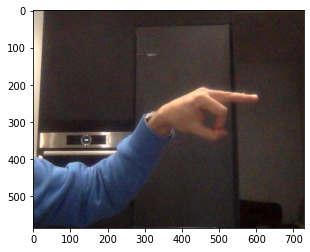

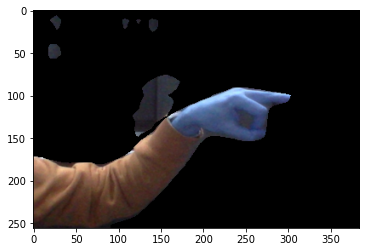

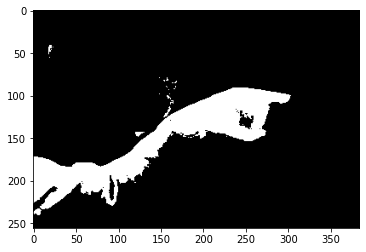

In [162]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8, 4))

def generate_dataframe(ind,number_of_samples):

    filtered_df = pd.DataFrame()
    for i,letter in enumerate(letters):
        print(letter)
        filtered_df= filtered_df.append(alphabet[alphabet.label==letter])
#                                         .iloc[ind*number_of_samples:(ind+1)*number_of_samples])
        print(filtered_df)  
    filtered_df["normalized_image"] = filtered_df.foto.apply(lambda path: normalize_image(path))
    

    return filtered_df
test_df = generate_dataframe(1,1)
# for i,img in enumerate(test_df['normalized_image']):
#     print(img.shape)
#     plt.imshow(img,cmap='gray')
#     plt.show()



    
